#connect to db

In [2]:
import pandas
import configparser
import psycopg2

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [10]:
conn = psycopg2.connect(
                        host = host, 
                        user = user, 
                        password = pwd, 
                        dbname = db)

#q1

In [13]:
sql = "select * from student"

In [14]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_16889/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,IA


#q2

In [15]:
sql = """  select professor.p_name,course.c_name
           from professor
           inner join course
           on professor.p_email = course.p_email  
"""

In [16]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_16889/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,p_name,c_name
0,p1,postgresql
1,p2,mongodb
2,p1,twitter
3,p3,facebook


#q3

In [37]:
sql = """  select c_number, count(*) as num_student
from enroll
group by c_number
order by num_student desc

"""

/tmp/ipykernel_16889/1433585107.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


<Axes: xlabel='c_number'>

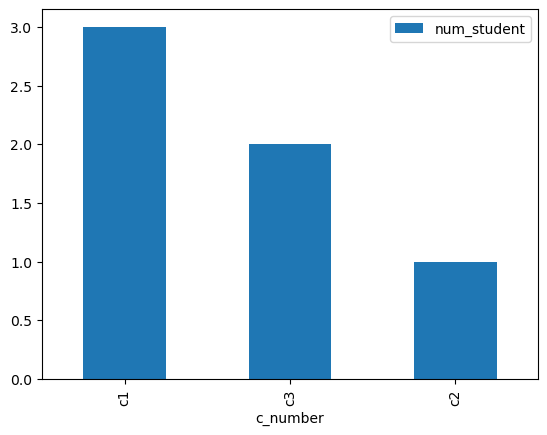

In [38]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x='c_number',y='num_student')

#q4

In [39]:
sql = """select p_name, count(*) as num_course
from course
join professor on course.p_email = professor.p_email
group by p_name
order by num_course desc
"""

/tmp/ipykernel_16889/720569572.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


<Axes: xlabel='p_name'>

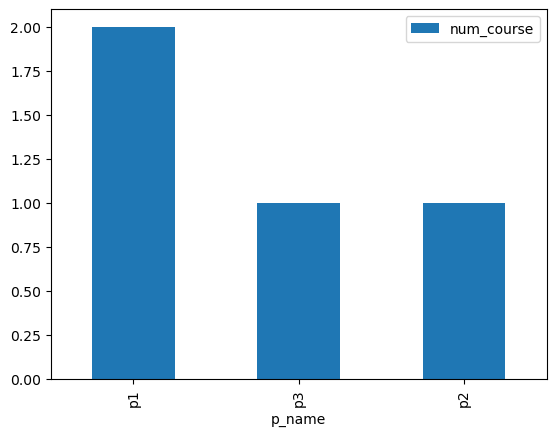

In [40]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x='p_name',y='num_course')

#q5

In [41]:
cur = conn.cursor()

In [42]:
sql = """ insert into professor(p_email,p_name,office)
values ('p4@jmu.edu','p4','o4') ;

"""

In [43]:
cur.execute(sql)

In [44]:
conn.commit()

In [47]:
df = pandas.read_sql_query('select * from professor', conn)

/tmp/ipykernel_16889/1816820779.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from professor', conn)


In [48]:
sql = """ insert into course(c_number,c_name,room,p_email)
values ('c5','linkedin','r2','p4@jmu.edu')

"""

In [49]:
cur.execute(sql)

In [50]:
conn.commit()

In [51]:
df = pandas.read_sql_query('select * from professor', conn)
df[:]

/tmp/ipykernel_16889/385041841.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from professor', conn)


,p_email,p_name,office
0,pl@jmu.edu,p1,o1
1,p2@jmu.edu,p2,o2
2,p3@jmu.edu,p3,o3
3,p4@jmu.edu,p4,o4
